# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
# importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import seaborn as sns

# jupyter magic to create plots in line
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

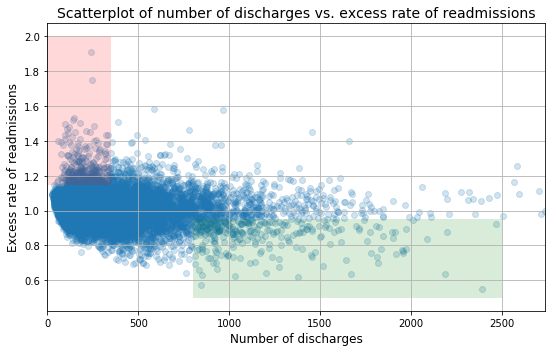

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Solution

### Reviewing the dataset

Prior to answering the questions, it is a good idea to have a quick look through the data we will be working with. 
Below we take a look at the first few rows of the dataset, the size of the dataset and the number of missing values in each column. 

In [5]:
# displaying first few rows of dataset
clean_hospital_read_df.head(7)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
# printing the size of the dataset
clean_hospital_read_df.shape

(11578, 12)

In [7]:
# displatying the number of missing values
pd.isnull(clean_hospital_read_df).sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

We note that the main columns of concern for our intended analyses is the number of discharges and the excess readmission ratio. Let's isolate these columns in a new dataframe and drop the missing values. 

In [8]:
# isolating columns
hospitals = clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges']]
hospitals = hospitals.dropna()

Now that we've further prepared the dataset, we can move on to our analyses. 


### A. Do you agree with the above analysis and recommendations? Why or why not?
I do not agree with the above analysis and recommendations for the following reasons:
* The conclusion that there is a significant correlation between the number of discharges and excess readmission ratios appears to be unfounded; the analytical evidence provided in support of the conclusion is a visual observation of the scatter plot and a comparison of two test statistics for "small" and "large" capacity hospitals. A statistical test will be the appropriate way to check for a significant correlation.  
* One of the recommendations made is inconsitent with the statistical analysis. While the analysis applies to hospitals/facilities with 100 or less discharges, one of the recommendations made is for hospitals/facilities with 300 or less discharges.

 

### B1. Set up an appropriate hypothesis test
To check the statistical validity of the conclusion made in the preliminary report, a hypothesis test will be used. As the analysis and conclusion assumes there is a negative correlation between excess readmission ratios and the number of discharges, the test used will be a one tail test.  

The hypothesis test will be made under the assumptions that the excess rate of readmissions in a given hospital is independent of the excess rate of readmissions in other hospitals. 

The null and alternative hypotheses are shown below:
* H<sub>0</sub> : $\rho$ = 0
* H<sub>1</sub> :  $\rho$ < 0

In words: 
* The null hypothesis states that there is no correlation between the excess readmission ratios and the number of discharges  
* The alternative hypothesis states that there is a negative correlation between the excess readmission ratios and the number of discharges.

### B2. Computing the test statistic
Below we calculate the p-value using the t-test. 

In [9]:
# creating a line of best fit using the data  
results = st.linregress(x = hospitals['Number of Discharges'], 
                        y = hospitals['Excess Readmission Ratio'])

# extracting results
slope, intercept, r_value, p_value_2t, stderr = results

# converting the two tail test p-value to a one-tail test p-value
p_value_1t = p_value_2t/2

print('p-value: ' + str(p_value_1t))

p-value: 6.11273688837e-26


### B3. Reporting statistical significance to $\alpha$ = 1%

In [10]:
# check what to print (only works since we know we need to compare results to lower tail)
sig_level = 0.01

if p_value_1t < sig_level:
    print('Z-test: The p-value (' + str(p_value_1t) + ') is less than ' + str(sig_level))
else:
    print('Z-test: The p-value (' + str(p_value_1t) + ') is greater than ' + str(sig_level))

Z-test: The p-value (6.11273688837e-26) is less than 0.01


Since, the p-value is smaller than the significance level $\alpha$, we reject the null hypothesis in favor of the alternative. There is sufficient evidence at the 1% signifiance level to conclude that there is a negative linear relationship in the population between the number of discharges and the excess readmission ratios.

### B4. Discuss statistical and practical significance. How does this affect your recommendation to the client?

Based on the two hypothesis tests, the analysis and conclusions are correct: there is a statistically significant negative correlation between excess readmission ratios and the number of discharges. 

To get an idea of the practical significance, let's compute the r<sup>2<\sup> value.

In [11]:
# calculating coefficient of determination
coeff_of_det = r_value**2
print('Coefficient of determination: ' + str(coeff_of_det))

Coefficient of determination: 0.00948635940013


We see from above that the r<sup>2</sup> value is 0.0095. This means that the number of discharges only accounts for ~1% of the variation in the excess readmission ratios. From a practical standpoint, this means that increasing the number of discharges may have an insignificant effect on the excess readmission ratio. Consequently, I will suggest that the client does not follow the recommendations in the preliminary report.

### B5. Analysis of the scatter plot in the preliminary analysis 
* The advantage of the plot is that it makes it possible to visualize most datapoints and their densities based on color variation.
* Disadvantage: The disadvantage is that the trend mentioned in section A of the preliminary replort is difficult to see without a line plot.

An alternative plot is shown below:

(0, 6793)

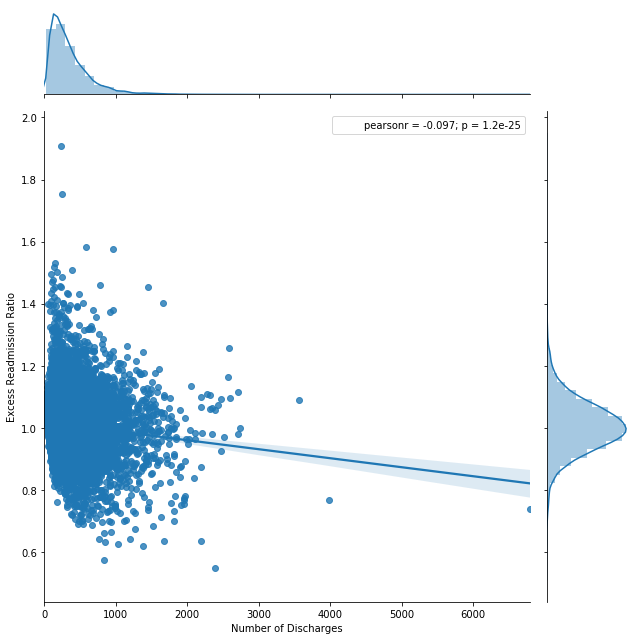

In [12]:
# code to create line of best fit and kde
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio',
              data=hospitals, kind = 'reg', size = 9) 
plt.xlim([0, hospitals['Number of Discharges'].max()])